# Day 14: Day 14: Model Evaluation Metrics Deep Dive

Today, we will dive deeper into model evaluation metrics, comparing their uses across **regression** and **classification** tasks. Evaluation metrics are critical to understanding how well your model performs, both on training and unseen test data.

We will also include references to earlier notebooks where these metrics were introduced, so you can revisit them for context.

## Topics Covered

- Evaluation Metrics Overview
- Regression Metrics
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R² Score (Coefficient of Determination)
- Classification Metrics
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - Confusion Matrix
  - ROC-AUC Score
- Visual Tools for Evaluation
- Comparison Table
- Summary and Next Steps

## Regression Metrics

### Mean Absolute Error (MAE)

$$\text{MAE}=\frac{1}{n}\sum_{i=1}^{n} (|y_i - \hat{y}_i|)$$


- Measures the average magnitude of errors without considering direction.
- Less sensitive to outliers than MSE.
- Expressed in the same unit as the target variable.

### Mean Squared Error (MSE)

$$\text{MSE}=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat y_i)^2$$

- Penalizes larger errors more due to squaring.
- Sensitive to outliers.

### Root MSE

$$\text{RMSE}=\sqrt{\text{MSE}}$$

- Brings the scale back to original units.
- Heavily penalizes large errors.

### R² {R-Square Score}(Co-efficient of determination)

$$R^2 = 1-\frac{\sum (y_i-\hat y_i)^2}{\sum (y_i-\bar y)^2}$$

- Measures proportion of variance explained by the model.
- Values range from -∞ to 1. Higher is better.

### When to Use

| Metric | Use Case |
|--------|----------|
| MAE    | robust to outliers (absolute error) |
| RMSE   | penalizes large errors more (squared error) |
| R²     | Overall model fit, scale-free goodness-of-fit (can be misleading with strong outliers or nonlinearity) (proportion of variance explained) |

### Example

In [16]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Synthetic regression data
X, y = make_regression(n_samples=300, n_features=3, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# Baseline model
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Baseline — MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

# Add a few outliers to test set
y_test_out = y_test.copy()
y_test_out[:5] = y_test_out[:5] + np.array([400, -350, 500, -450, 600])  # big shocks
mse_o  = mean_squared_error(y_test_out, y_pred)
rmse_o = root_mean_squared_error(y_test_out, y_pred)
mae_o  = mean_absolute_error(y_test_out, y_pred)
r2_o   = r2_score(y_test_out, y_pred)

print(f"With Outliers — MSE: {mse_o:.2f}, RMSE: {rmse_o:.2f}, MAE: {mae_o:.2f}, R²: {r2_o:.3f}")


Baseline — MSE: 210.49, RMSE: 14.51, MAE: 11.95, R²: 0.985
With Outliers — MSE: 14994.78, RMSE: 122.45, MAE: 41.73, R²: 0.562


## Classification Metrics

### Accuracy

- **Formula:** 

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$


- Proportion of correct predictions.
- Can be misleading in imbalanced datasets.

### Precision

- **Formula:** 

$$ Precision = \frac{TP}{TP + FP} $$

- Out of all predicted positives, how many are actually positive?
- Useful in **spam detection**, **fraud detection**, etc.

### Recall (Sensitivity)

- **Formula:** 

$$ Recall = \frac{TP}{TP + FN} $$



- Out of all actual positives, how many did we correctly predict?
- Important in **medical diagnosis**, **churn prediction**, etc.

### F1 Score

- **Formula:** 

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$


- Harmonic mean of precision and recall.
- Balances the two when both are important.

### Confusion Matrix Terms

A Confusion Matrix is a table that summarizes the performance of a classification model.  It visually represents the number of correct and incorrect predictions made by the model, broken down by each class.


- **TP (True Positive)**: The model correctly predicted a positive class
    - predicted 1, actual 1
- **TN (True Negative)**: The model correctly predicted a negative class
    - predicted 0, actual 0
- **FP (False Positive)**: The model incorrectly predicted a positive class when it was actually negative. This is also known as a Type I error.
    - predicted 1, actual 0
- **FN (False Negative)**: The model incorrectly predicted a negative class when it was actually positive. This is also known as a Type II error.
    - predicted 0, actual 1

### ROC-AUC

Ranking score based on TPR vs FPR.

ROC-AUC stands for Receiver Operating Characteristic - Area Under the Curve. It's a performance metric for classification models that measures the model's ability to distinguish between positive and negative classes. The ROC curve is a graph that plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

TPR (Recall): 
$$ TPR= \frac{TP+FN}{TP}$$
​
 

FPR: 
$$ FPR= \frac{FP+TN}{FP}$$
​
 

The AUC is the area under this curve. An AUC of 1.0 represents a perfect model, while an AUC of 0.5 suggests a model with no discriminatory power (as good as random guessing). ROC-AUC is useful because it is threshold-independent and gives a single value summarizing the model's performance across all possible classification thresholds.

### PR-AUC

Best for imbalanced datasets.

PR-AUC stands for Precision-Recall - Area Under the Curve. It's similar to ROC-AUC but uses a different set of axes: Precision and Recall. The PR curve plots Precision on the y-axis against Recall on the x-axis for various thresholds. PR-AUC is especially useful and preferred for imbalanced datasets.

In a highly imbalanced dataset, a model can achieve a high ROC-AUC by simply having a high True Negative rate, even if it performs poorly on the minority class. PR-AUC, on the other hand, focuses on the minority (positive) class, giving a more realistic picture of the model's performance. A high PR-AUC score indicates that the model is performing well in identifying positive instances without making too many false positive errors, which is crucial when the positive class is rare.

### LOG LOSS

Penalizes overconfident incorrect predictions (uses predicted probabilities).

Log Loss, or Binary Cross-Entropy, is a metric that evaluates the performance of a classification model by penalizing it for making overconfident incorrect predictions. It uses the predicted probabilities, not just the final class predictions.

The formula for binary log loss is:

$$
Log Loss = - \frac{1}{N} \sum_{i=1}^{N} [y_i \log(p_i) + (1-y_i) \log(1-p_i)]
$$

where:

$$ N $$ is the number of samples.
 y_i  is the actual label (0 or 1).

p_i $$  is the predicted probability of the sample being positive.

Log loss heavily penalizes predictions that are confident but wrong. For example, if the actual label is 1 but the model predicts a probability of 0.01, the log loss for that prediction would be very large. Conversely, if the model predicts a probability of 0.99 for an actual label of 1, the loss would be very small. A perfect model would have a log loss of 0. Log loss is a valuable metric for models that output probabilities, as it encourages them to be well-calibrated and not just right.

### Example

In [17]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, log_loss
)

# Example true labels and predicted probabilities
y_true = [0, 1, 1, 0, 1, 0, 1, 1]  # Ground truth (0 or 1)
y_pred = [0, 1, 0, 0, 1, 0, 1, 1]  # Predicted labels (0 or 1)
y_prob = [0.1, 0.9, 0.4, 0.2, 0.8, 0.3, 0.7, 0.95]  # Predicted probabilities for class 1

# Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_prob)
pr_auc = average_precision_score(y_true, y_prob)
logloss = log_loss(y_true, y_prob)

# Display
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC–AUC: {roc_auc:.2f}")
print(f"PR–AUC: {pr_auc:.2f}")
print(f"Log Loss: {logloss:.4f}")


Accuracy: 0.88
Precision: 1.00
Recall: 0.80
F1 Score: 0.89
ROC–AUC: 1.00
PR–AUC: 1.00
Log Loss: 0.2922


### Visual Tools for Evaluation

### Visual Tools for Evaluation
- **Regression:**
  - Predicted vs Actual Plot
  - Residual Plot
- **Classification:**
  - Confusion Matrix
  - ROC Curve
  - Precision-Recall Curve


#### Regression

##### Predicted vs Actual Plot

Shows how well predictions match the true values. Ideally, points should align along the 45° diagonal line.

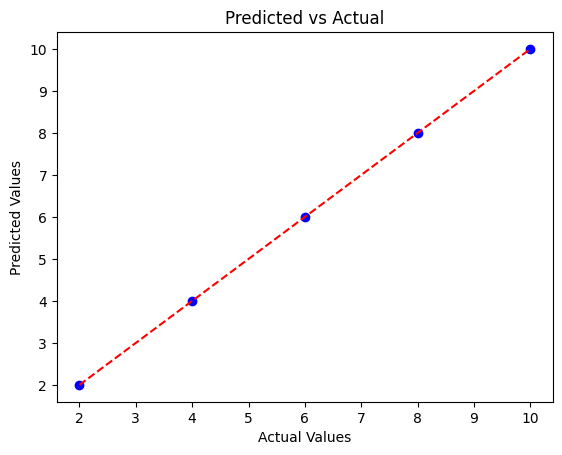

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10])

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Predicted vs Actual Plot
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()


Interpretation:

- Points close to red line → good predictions.

- Large deviation from line → poor fit.

##### Residual Plot

Residuals = (Actual − Predicted).
Random scatter around 0 means a good model.

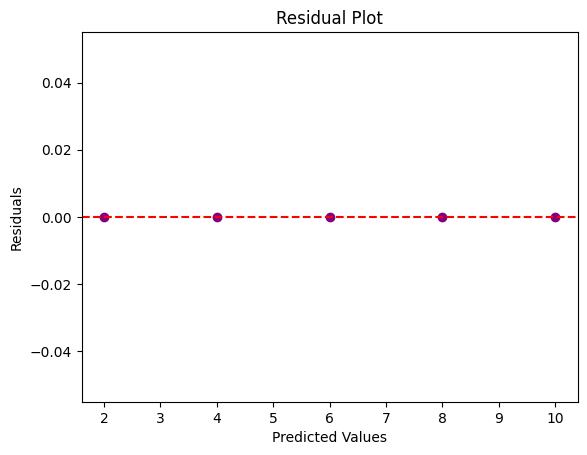

In [19]:
residuals = y - y_pred
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Interpretation:

- Residuals spread randomly → good model.

- Patterns (curves, trends) → model is missing something (underfitting/overfitting).

### Picking the right metrics ( By senario)


| Metric     | Type          | Best Use Case                             |
|------------|---------------|--------------------------------------------|
| MAE        | Regression     | General error measurement                  |
| MSE        | Regression     | Penalizes large errors                     |
| RMSE       | Regression     | Scaled error metric                        |
| R² Score   | Regression     | Explains variance                          |
| Accuracy   | Classification | Balanced datasets                          |
| Precision  | Classification | Cost of false positives is high            |
| Recall     | Classification | Cost of false negatives is high            |
| F1 Score   | Classification | Trade-off between Precision and Recall     |
| ROC-AUC    | Classification | Overall model separability                 |


| Scenario | Preferred Metrics | Why |
|----------|------------------|-----|
| House price prediction | MAE or RMSE | MAE for interpretability; RMSE to penalize big errors |
| Medical diagnosis (catch all positives) | Recall | Missing a positive is risky |
| Fraud detection | Precision + Recall, PR–AUC | Imbalanced data, rare events |
| Email spam filter | F1 Score | Balance precision and recall |
| Model ranking emails | ROC–AUC | Good for comparing ranks |

### Using Metrics with Cross-validation and Grid Search

In [26]:

from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Example: classification using PR–AUC as scoring
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Cross-validation
scores = cross_val_score(pipe, X, y, cv=cv, scoring="average_precision")
print("CV PR–AUC (mean ± std):", scores.mean(), "±", scores.std())

# GridSearch
grid = GridSearchCV(
    estimator=pipe,
    param_grid={"clf__C": [0.01, 0.1, 1, 10]},
    scoring="f1",
    cv=cv,
    n_jobs=-1
)
grid.fit(X, y)
print("Best F1:", grid.best_score_, "with params:", grid.best_params_)

ValueError: n_splits=4 cannot be greater than the number of members in each class.